## <div align="center"> TUGAS LAB IS794 DEEP LEARNING </div>
### <div align="center"> WEEK [03] : [Keras and TensorFlow] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [1]:
import tensorflow as tf

In [3]:
#Create tensors
scalar = tf.constant(42)
vector = tf.constant([[1,2,3], [4,5,6]])
matrix = tf.constant([[1,2,3], [4,5,6]])

In [4]:
# Tensor operations
result_add = tf.add(vector, vector)
result_sub = tf.subtract(matrix, scalar)
result_mul = tf.multiply(matrix, matrix)
result_div = tf.divide(scalar, matrix)

In [6]:
# Broadcasting
scalar_broadcasted = scalar + matrix
vector_broadcasted = vector * matrix

Broadcasting adalah teknik yang digunakan dalam TensorFlow untuk menjalankan operasi antara tensor-tensor dengan bentuk yang berbeda secara otomatis, tanpa perlu mengubah bentuk tensor secara eksplisit. Contoh pada code di atas: vector_broadcasted = vector * matrix: Di sini, vector adalah tensor matriks 2D dengan bentuk (2, 3) dan matrix adalah tensor matriks dengan bentuk yang sama (2, 3). Dalam operasi ini, kedua tensor dioperasikan secara element-wise, dan broadcasting tidak diperlukan karena kedua tensor memiliki bentuk yang sesuai.

In [7]:
# Reshaping tensors
reshaped_matrix = tf.reshape(matrix, (3,2))

In [8]:
# Reduction operations
sum_matrix = tf.reduce_sum(matrix)
mean_matrix = tf.reduce_mean(matrix, axis=0)
max_vector = tf.reduce_max(vector)

In [9]:
# Perform other operations and print results
result_add_value = (result_add)
result_sub_value = (result_sub)

In [11]:
# Display results
print("Addition Result:", result_add_value)
print("Subtraction Result:", result_sub_value)
print("Sum Matrix", sum_matrix)
print("Mean Matrix", mean_matrix)
print("Max Matrix", max_vector)

Addition Result: tf.Tensor(
[[ 2  4  6]
 [ 8 10 12]], shape=(2, 3), dtype=int32)
Subtraction Result: tf.Tensor(
[[-41 -40 -39]
 [-38 -37 -36]], shape=(2, 3), dtype=int32)
Sum Matrix tf.Tensor(21, shape=(), dtype=int32)
Mean Matrix tf.Tensor([2 3 4], shape=(3,), dtype=int32)
Max Matrix tf.Tensor(6, shape=(), dtype=int32)


### Exercise 2: Using CIFAR Dataset

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

170498071/170498071 [==============================] - 147s 1us/step


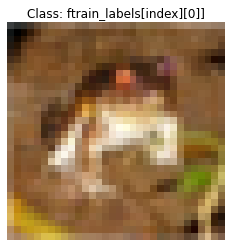

In [16]:
cifar = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

#Choose an index to select an example image from the dataset.
#Use matplotlib to display the image.

#Choose an index (e.g., index e for the first image)
index = 0

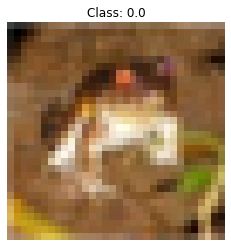

In [33]:
#Display the selected image
plt.figure(figsize=(4,4))
plt.imshow(train_images[index])
plt.title(f"Class: {train_labels[index][0]}") # Assuming Labels are one-hot encoded
plt.axis('off')
plt.show()

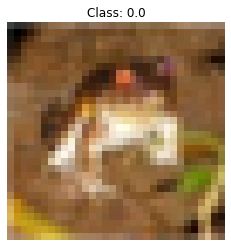

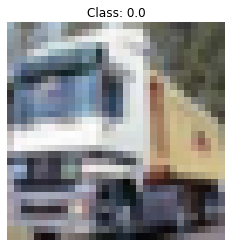

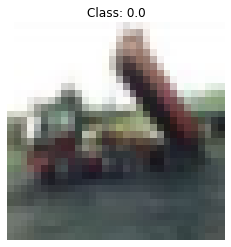

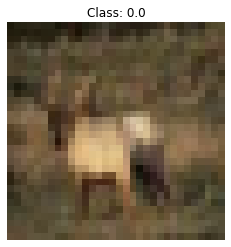

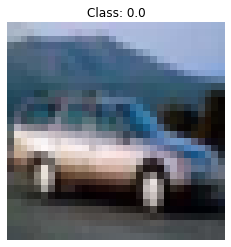

In [32]:
for i in [0,1,2,3,4]:
    plt.figure(figsize=(4,4))
    plt.imshow(train_images[i])
    plt.title(f"Class: {train_labels[i][0]}") # Assuming Labels are one-hot encoded
    plt.axis('off')
    plt.show()
    

In [17]:
# Data preprocessing steps
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = keras.utils.to_categorical(train_labels,10)
test_labels = keras.utils.to_categorical(test_labels,10)

In [19]:
print(train_labels)
print(test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [26]:
# Create a convolutional neural network (CNN) model using Keras.
# Choose an appropriate architecture with convolutional, pooling, fully connected layers, and output Layer.
# Compile the model with a suitable optimizer, loss function, and metrics.
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#Give your answer here
# from keras.losses import SparseCategoricalCrossentropy

# model = keras.Sequential([
#     keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
#     keras.layers.MaxPooling2D((2,2)),
#     keras.layers.Conv2D(64,(3,3), activation='relu'),
#     keras.layers.MaxPooling2D((2,2)),
#     keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     keras.layers.Flatten(),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss=SparseCategoricalCrossentropy(from_logits=False),
#               metrics=['accuracy'])


In [27]:
# Train the model using the training data.
# Choose an approriate number of epochs and batch size.

history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 18s 27ms/step - loss: 1.6275 - accuracy: 0.4053 - val_loss: 1.3431 - val_accuracy: 0.5201
Epoch 2/10
625/625 [==============================] - 17s 27ms/step - loss: 1.2672 - accuracy: 0.5483 - val_loss: 1.2045 - val_accuracy: 0.5802
Epoch 3/10
625/625 [==============================] - 17s 26ms/step - loss: 1.1282 - accuracy: 0.5998 - val_loss: 1.1177 - val_accuracy: 0.6037
Epoch 4/10
625/625 [==============================] - 16s 26ms/step - loss: 1.0356 - accuracy: 0.6370 - val_loss: 1.1108 - val_accuracy: 0.6115
Epoch 5/10
625/625 [==============================] - 17s 27ms/step - loss: 0.9550 - accuracy: 0.6638 - val_loss: 1.1028 - val_accuracy: 0.6239
Epoch 6/10
625/625 [==============================] - 17s 26ms/step - loss: 0.8997 - accuracy: 0.6823 - val_loss: 0.9893 - val_accuracy: 0.6560
Epoch 7/10
625/625 [==============================] - 16s 26ms/step - loss: 0.8471 - accuracy: 0.7036 - val_loss: 0.9578 - val_accuracy:

In [34]:
# Evaluate teh model's performance on the dataset.
# Calculate accuracy and loss.

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 5s 15ms/step - loss: 0.8758 - accuracy: 0.7007
Test accuracy: 0.7006999850273132


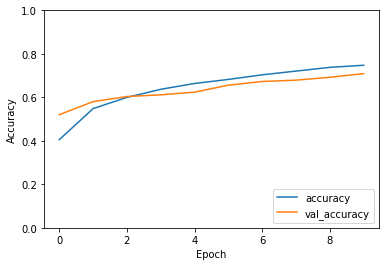

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()

In [36]:
# Display the images along with their predicted and actual classes.
# prediction using test_iamges
predictions = model.predict(test_images)
# For example, display the prediction for image index 20
predicted_classes = tf.argmax(predictions, axis=1).numpy()[20]
actual_classes = tf.argmax(test_labels,axis=1).numpy()[20]

313/313 [==============================] - 5s 14ms/step


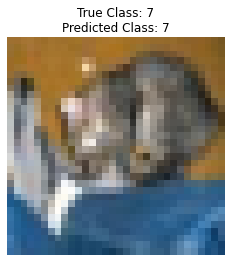

In [37]:
plt.figure(figsize=(4,4))
plt.imshow(test_images[index])
plt.title(f"True Class: {actual_classes}\nPredicted Class: {predicted_classes}")
plt.axis('off')
plt.show()